## Section 5

### Problem 1: What topics does the navigator subscribe to? What is the purpose of each of these topics? What topics does it publish to, and why?

#### Topics the navigator subscribe to:

'/map', the navigator needs to know the map info of the environment;

'/map_metadata', includes map_load_time,resolution,width,height,origin, which is helpful in calculating map occupancy grid

'/cmd_nav', receives Pose2D as the target of the navigation in each iteration.


#### Topics the navigator publish:

'/planned_path'
Publishes the planned path denoted by 'Path', which contains an array of poses that represents a path for a robot to follow.


'/cmd_smoothed_path'
Publishes the smoothed path, also given by 'Path' class;

'/cmd_smoothed_path_rejected'
Publishes the rejected smoothed path, according to the comment, this is because the path is longer then the current plan.

'/cmd_vel'
Publishes the velocity which contains both linear and angular parts.

### Problem 2: Describe what each mode of the state machine does, and intuitively when the node switches between modes.

Mode.IDLE: Robot in idle;  

Mode.ALIGN: Align robot with starting direction of path, once aligned, switch to TRACK mode.  

Mode.TRACK: Tacking the robot with the goal position. If close enough to the goal, switch to PARK mode; otherwise replan in TRACK mode.  

Mode.PARK: Park the robot at the goal position with enough accuracy. Once reaches the goal, switch to IDLE

### Problem 3: Test this out. Include a screenshot of rviz as your robot navigates the map.

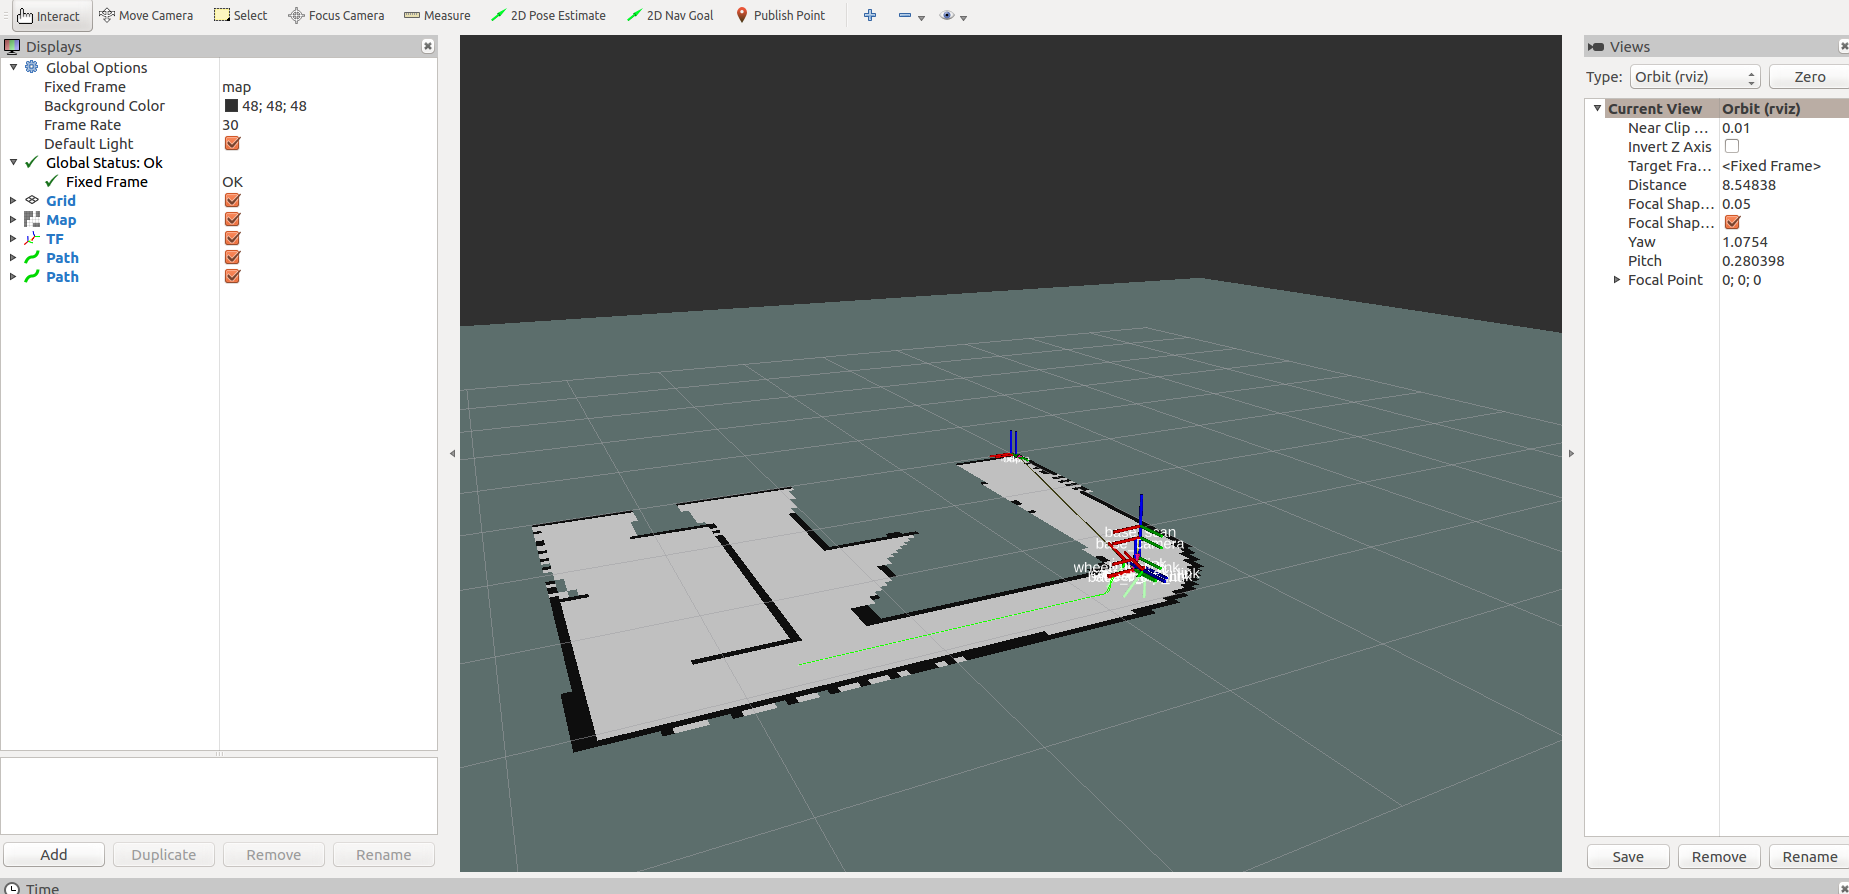

In [1]:
from IPython.display import Image
Image(filename='screen1.png') 

### Problem 4: Include this code in your submission.

In [ ]:
#!/usr/bin/env python

import rospy
from visualization_msgs.msg import Marker
from geometry_msgs.msg import Pose2D


# use global variables to update the navigation goal
x_g = 0.0
y_g = 0.0
theta_g = 0.0
def cmd_nav_callback(data):
    """
    loads in goal if different from current goal, and replans
    """
    rospy.loginfo(rospy.get_caller_id() + "I heard %f, %f, %f", data.x,data.y,data.theta)
    global x_g
    global y_g
    global theta_g

    x_g = data.x
    y_g = data.y
    theta_g = data.theta

def publisher():
    vis_pub = rospy.Publisher('marker_topic', Marker, queue_size=10)
    rospy.init_node('marker_node', anonymous=True)

    rospy.loginfo("Subscriber created")
    rospy.Subscriber('/cmd_nav', Pose2D, cmd_nav_callback)
    rate = rospy.Rate(1)

    while not rospy.is_shutdown():
        marker = Marker()

        marker.header.frame_id = "map"
        marker.header.stamp = rospy.Time()

        # IMPORTANT: If you're creating multiple markers, 
        #            each need to have a separate marker ID.
        marker.id = 0

        marker.type = 1 # sphere

        marker.pose.position.x = x_g
        marker.pose.position.y = y_g
        marker.pose.position.z = 1

        marker.pose.orientation.x = 0.0
        marker.pose.orientation.y = 0.0
        marker.pose.orientation.z = 0.0
        marker.pose.orientation.w = 1.0

        marker.scale.x = 0.1
        marker.scale.y = 0.1
        marker.scale.z = 0.1

        marker.color.a = 1.0 # Don't forget to set the alpha!
        marker.color.r = 0.0
        marker.color.g = 1.0
        marker.color.b = 0.0
        
        vis_pub.publish(marker)
        print('Published marker!', x_g, y_g)
        
        rate.sleep()


if __name__ == '__main__':
    try:
        publisher()
    except rospy.ROSInterruptException:
        pass


### Problem 5: Include the contents of this launch file in your submission

In [ ]:
<launch>

  <node pkg="section5" type="marker_pub.py" name="marker_pub" output="screen" />
  <node name="rviz" pkg="rviz" type="rviz" args="-d $(find section5)/rviz/my_nav.rviz"/>
  
</launch>
